****
# Introduction #
****
**The aim of this notebook is to successfully classify the Air Quality Level**

**If you Liked this Notebook or if you found it helpful kindly Upvote**

****
# Dataset Description #
****

1. Temperature (°C): Average temperature of the region.
2. Humidity (%): Relative humidity recorded in the region.
3. PM2.5 Concentration (µg/m³): Fine particulate matter levels.
4. PM10 Concentration (µg/m³): Coarse particulate matter levels.
5. NO2 Concentration (ppb): Nitrogen dioxide levels.
6. SO2 Concentration (ppb): Sulfur dioxide levels.
7. CO Concentration (ppm): Carbon monoxide levels.
8. Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
9. Population Density (people/km²): Number of people per square kilometer in the region.

    
**10.Air Quality Levels (Target Variable)**


* Good: Clean air with low pollution levels.
* Moderate: Acceptable air quality but with some pollutants present.
* Poor: Noticeable pollution that may cause health issues for sensitive groups.
* Hazardous: Highly polluted air posing serious health risks to the population.
ulation.tion.

****
# Reading and Displaying the Dataset #
****

In [1]:
# importing 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#Reading and displaying the dataset
df=pd.read_csv(r'/kaggle/input/air-quality-and-pollution-assessment/updated_pollution_dataset.csv')
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


****
# Data Visualization and Analysis #
****

In [3]:
#importing
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


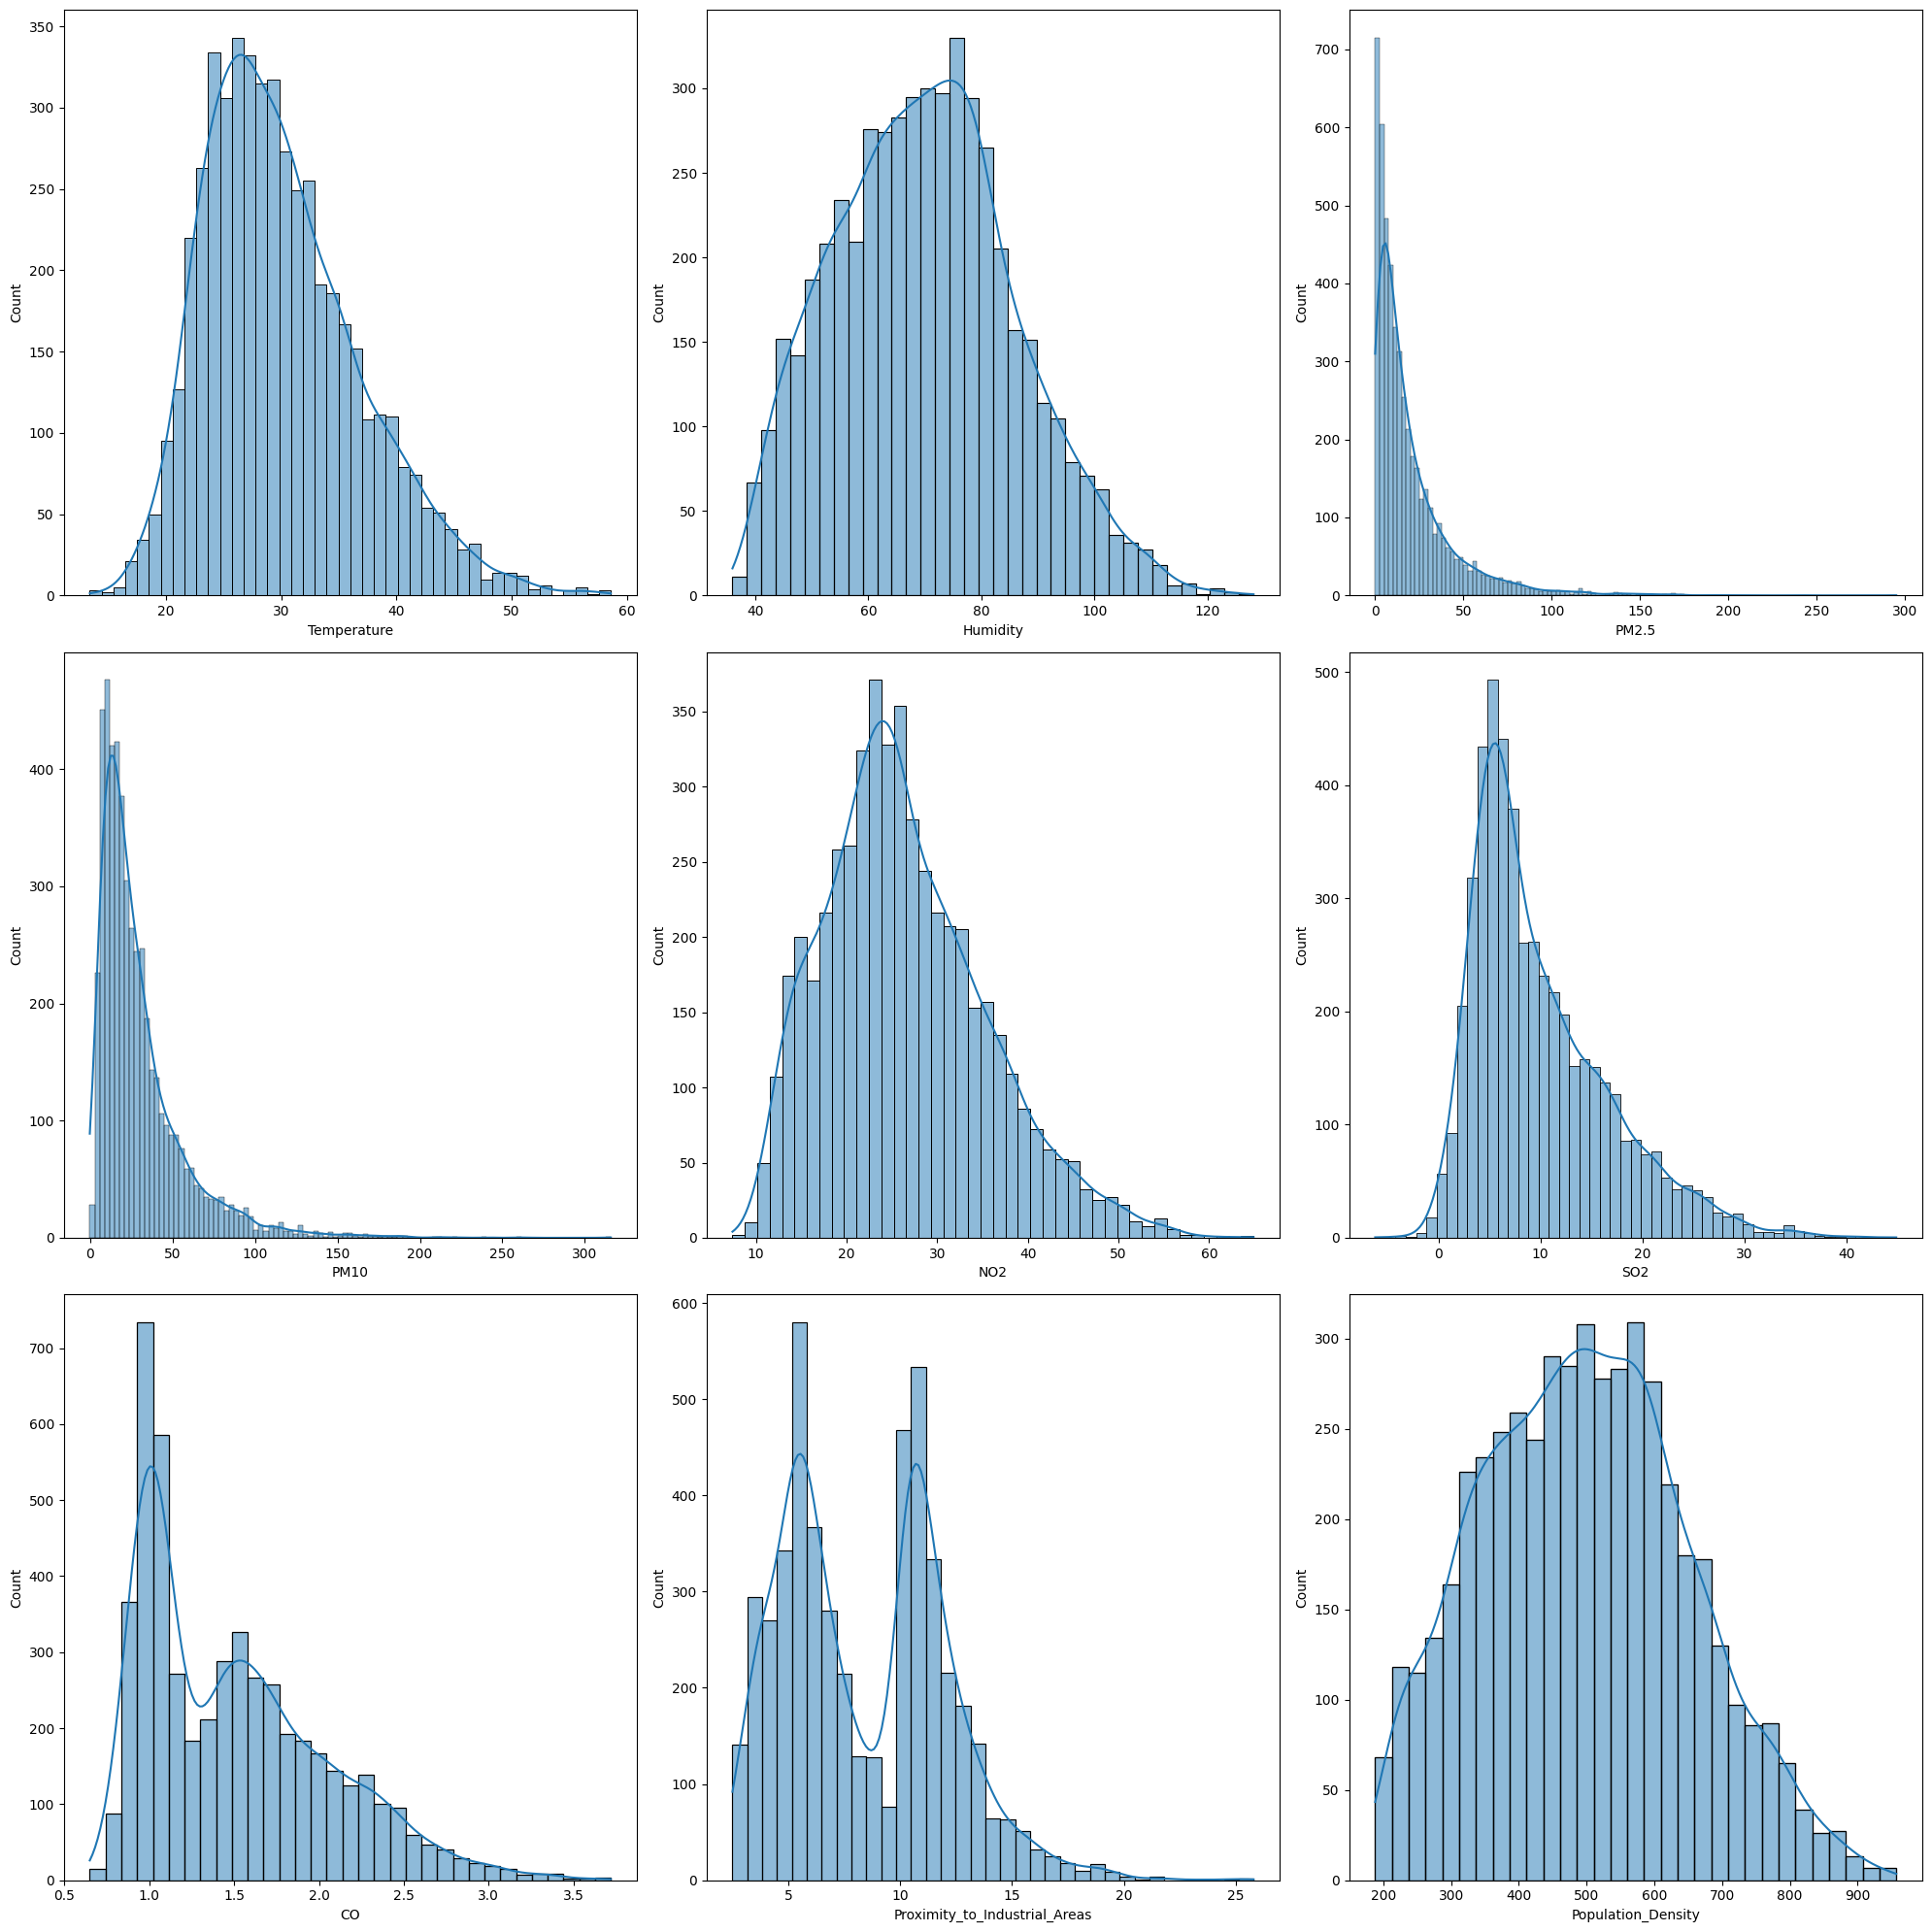

In [6]:
# All of our columns other than our Target Variable is continuous in nature
# Let us visualize the distributions using Histograms

fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
i=0

for col in df.columns:
    if(col!='Air Quality'):
        sns.histplot(data=df,x=col,kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

**Findings:**

1. Temperature
   

* The distribution of temperature appears to be normal but slightly right-skewed.
* Most of the temperature values are concentrated between 20°C and 35°C.
* There are fewer occurrences of temperatures below 15°C and above 45°C, indicating outliers or rare events.


2. Humidity


* Humidity also shows a slight right-skewed distribution.
* The majority of the humidity values lie between 50% and 80%.
* Very high humidity values (above 100%) are relatively rare.


3. PM2.5


* PM2.5 levels have a highly skewed distribution with a concentration of values at the lower range.
* Most PM2.5 values fall under 0 to 50 micrograms/m³, suggesting lower pollution levels for most cases.
* However, some extreme values above 100+ indicate sporadic periods of high pollution.


4. PM10


* Similar to PM2.5, PM10 values show a right-skewed distribution.
* Most PM10 readings are concentrated between 0 and 50 micrograms/m³.
* A few values reach as high as 300, indicating rare but severe pollution episodes.


5. NO2 (Nitrogen Dioxide)


* The NO2 levels follow a right-skewed distribution.
* The majority of NO2 values lie between 10 and 40 micrograms/m³.
* Very high levels (>50) are uncommon, indicating pollution spikes.

6. CO (Carbon Monoxide)
   

* The distribution of CO is right-skewed.
* Most CO values are concentrated around 1.0 to 1.5.
* A smaller number of instances reach higher values, above 2.5, representing occasional spikes in CO levels.
* The skewness suggests occasional pollution events but a predominance of low CO levels.

7. Proximity to Industrial Areas


* The distribution of this variable appears to be bimodal (two peaks).
* One peak occurs around 5 units of proximity, and another peak is around 10 units.
* This bimodal behavior may indicate distinct clusters, possibly separating areas close and moderately far from industrial zones.
* Very few values exceed 15 units, suggesting that most data points represent locations relatively close to industrial areas.

8. Population Density


* Population density follows a normal-like distribution with slight skewness.
* The values are concentrated between 400 and 600, indicating typical population density for most regions in the dataset.
* The distribution tails off for lower densities (<300) and higher densities (>800), showing less frequent occurrences.




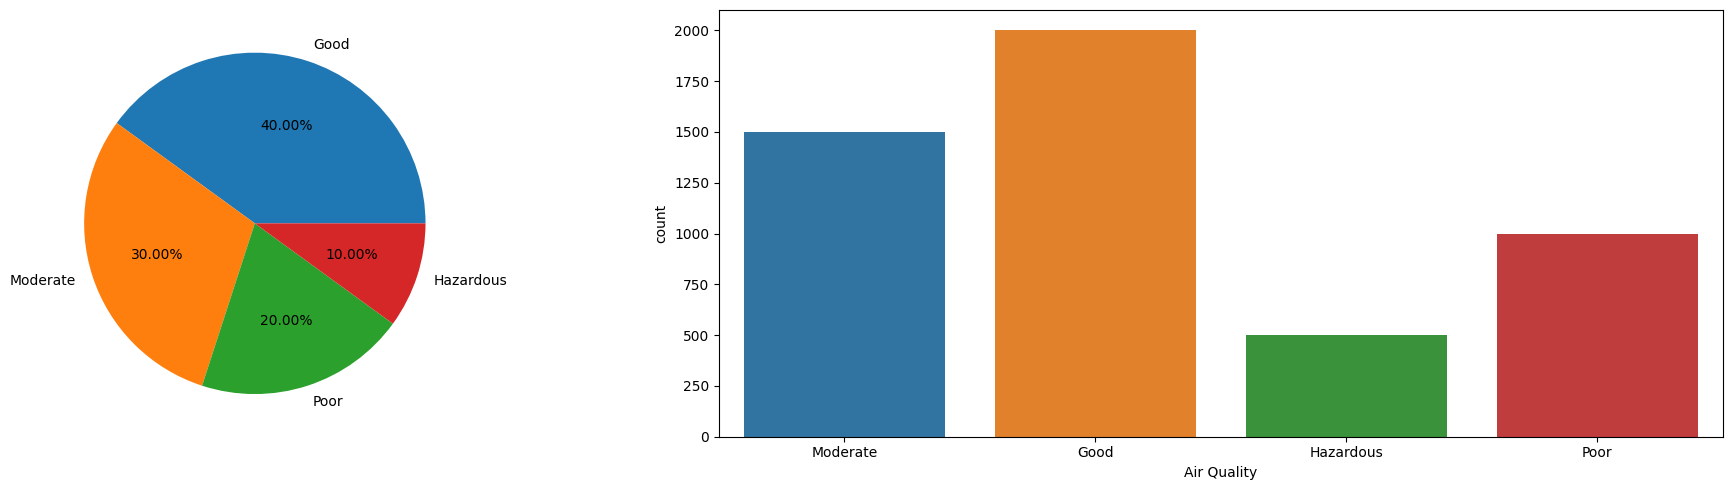

In [7]:
# Now let us take a look at our Target Variable
fig,ax=plt.subplots(1,2,figsize=(20,5))

tdf=df['Air Quality'].value_counts().reset_index()
ax[0].pie(tdf['count'],labels=tdf[col],autopct='%.2f%%')
ax[0].set_aspect('equal')
sns.countplot(data=df,x=col,ax=ax[1])
plt.tight_layout()
plt.show()

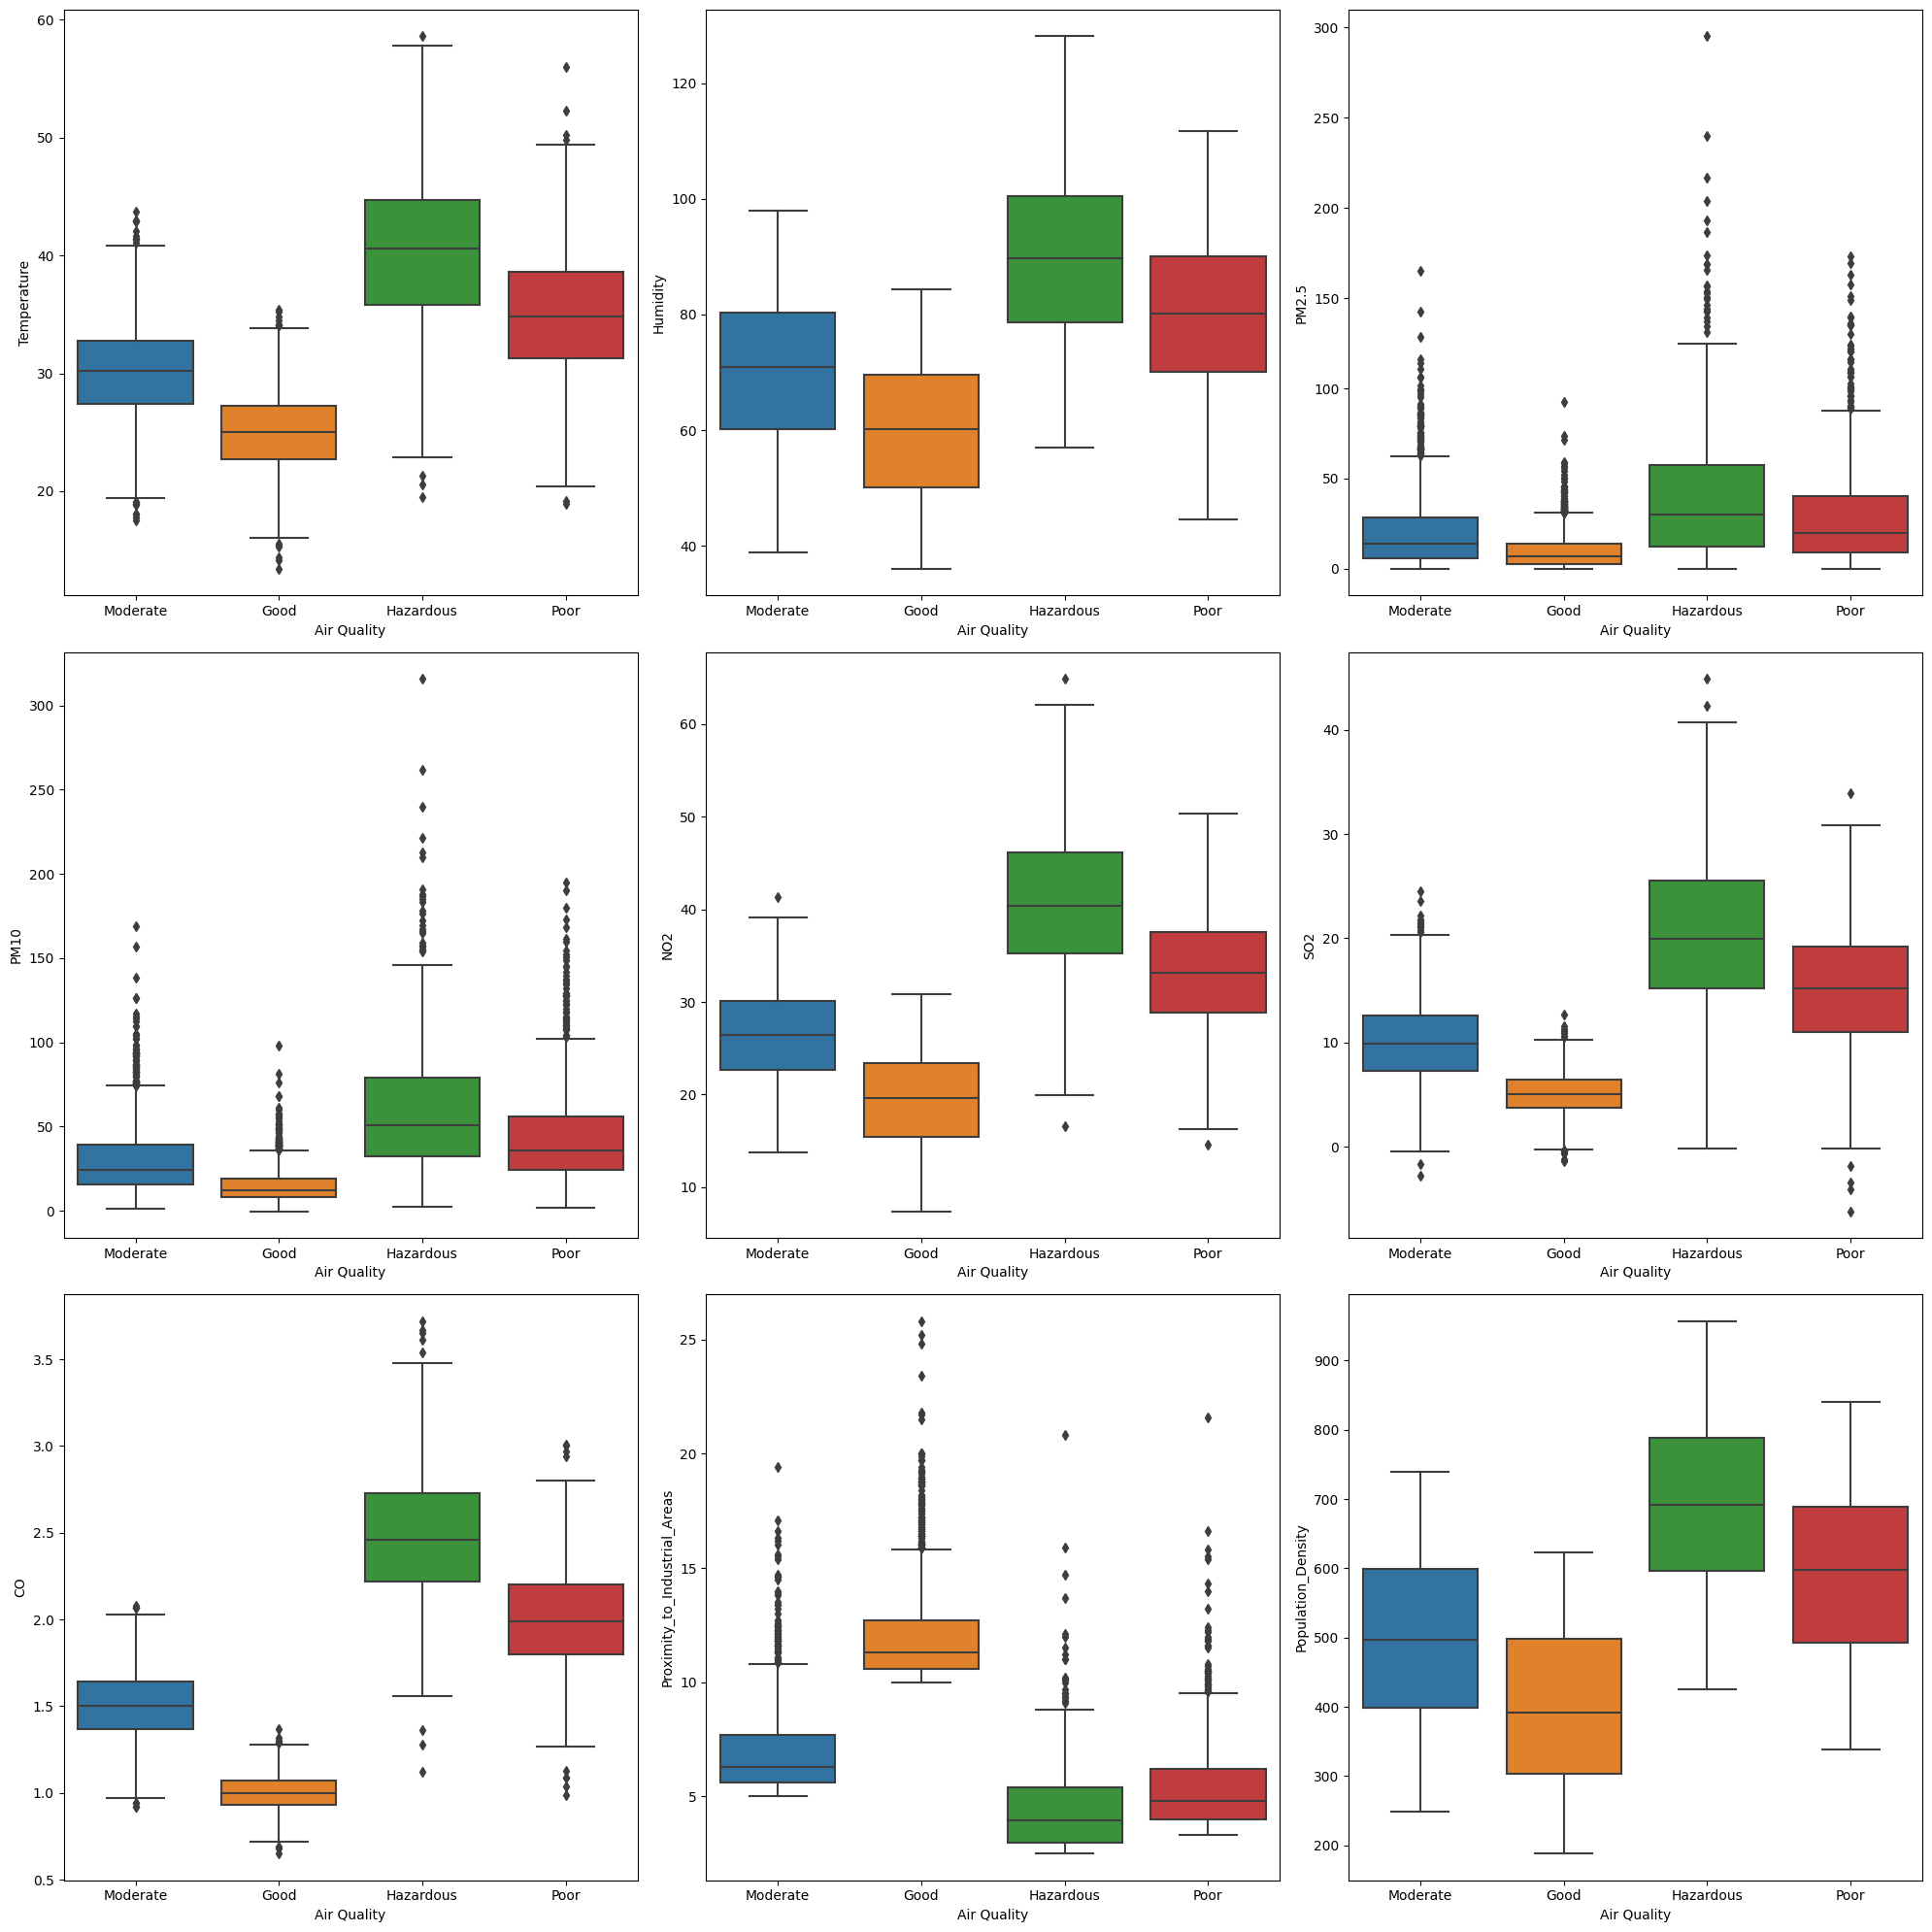

In [8]:
# Looks like our target variable is unbalanced :(
# Let us look at how our features affect our target variable

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()
i = 0
cols=df.drop(columns='Air Quality')
for col in cols:
    sns.boxplot(data=df, x='Air Quality', y=col, ax=ax[i])
    i += 1
plt.tight_layout()
plt.show()

**Conclusions:**

1. Temperature vs Air Quality


* Good air quality has the lowest temperature range (around 20-30°C) with fewer outliers.
* Hazardous air quality shows a higher temperature range, with values reaching up to 60°C.
* Moderate and Poor air quality have similar temperature distributions but with more spread than Good.
* Observation: Higher temperatures seem to correlate with poorer air quality, which may be linked to higher emissions or industrial activity in hot weather.

2. Humidity vs Air Quality


* Good air quality has lower humidity values, mainly between 40-70%.
* Hazardous air quality has the widest range, spanning from 60% to 120%, suggesting more variability.
* Moderate and Poor air quality have overlapping ranges (50-100%).
* Observation: Higher humidity levels are associated with hazardous air quality, possibly due to increased pollutant retention in the air.

3. PM2.5 vs Air Quality


* Good air quality has consistently low PM2.5 levels (mostly below 20).
* Hazardous air quality shows significantly higher PM2.5 values, often exceeding 100.
* Moderate and Poor air quality fall between these two extremes but still show notable variability.
* Observation: PM2.5 levels are a clear indicator of worsening air quality, with hazardous air containing extreme outliers.

4. PM10 vs Air Quality


* Good air quality has PM10 levels generally below 50.
* Hazardous air quality exhibits the largest range, with values exceeding 300.
* Poor air quality has moderate PM10 levels (20-100), while Moderate air quality remains slightly lower.
* Observation: PM10 shows a trend similar to PM2.5, reinforcing its role as a key factor in air quality degradation.

5.  NO2 (Nitrogen Dioxide) vs Air Quality
   

* Good air quality has NO2 levels below 30.
* Hazardous air quality shows high NO2 values, peaking around 60.
* Moderate and Poor air quality maintain intermediate levels, generally below 40.
* Observation: Elevated NO2 levels are strongly associated with hazardous air quality, likely stemming from industrial or vehicular emissions.

6. SO2 (Sulfur Dioxide) vs Air Quality


* Good air quality has low SO2 levels, concentrated below 15.
* Hazardous air quality has higher SO2 levels, exceeding 40 in some cases.
* Poor and Moderate air quality display intermediate levels with wider spreads.
* Observation: Higher SO2 levels are linked to poor and hazardous air quality, indicative of combustion processes or industrial activities.

7. CO vs Air Quality

* Good Air Quality has CO Levels below 1.4
* Moderate Air Quality has CO Levels between 1 and 2
* Hazardous and Poor have a varying range from 1.5 upto 3.5 for Hazardous and upto 3 for Poor Air Quality
* Observation: Higher CO levels are directly linked to deterioating Air Quality

8. Proximity to Industrial Areas vs Air Quality


* Good air quality is observed at lower proximity levels (around 5 to 15).
* Hazardous air quality shows higher proximity to industrial areas, with values peaking above 20.
* Moderate and Poor air quality lie between, with varying spreads but generally closer to industrial areas than Good air quality.
* Observation: Increased proximity to industrial areas is strongly associated with degraded air quality, suggesting industrial activities contribute significantly to pollution levels.

9. Population Density vs Air Quality


* Good air quality is found in areas with lower population density (around 300–500 people per unit area).
* Hazardous and Poor air quality are observed in areas with higher population densities, peaking above 700.
* Moderate air quality spans a broader range but stays below 600 in most cases.
* Observation: Higher population density correlates with poorer air quality, potentially due to increased emissions from human activities like transportation and energy use.



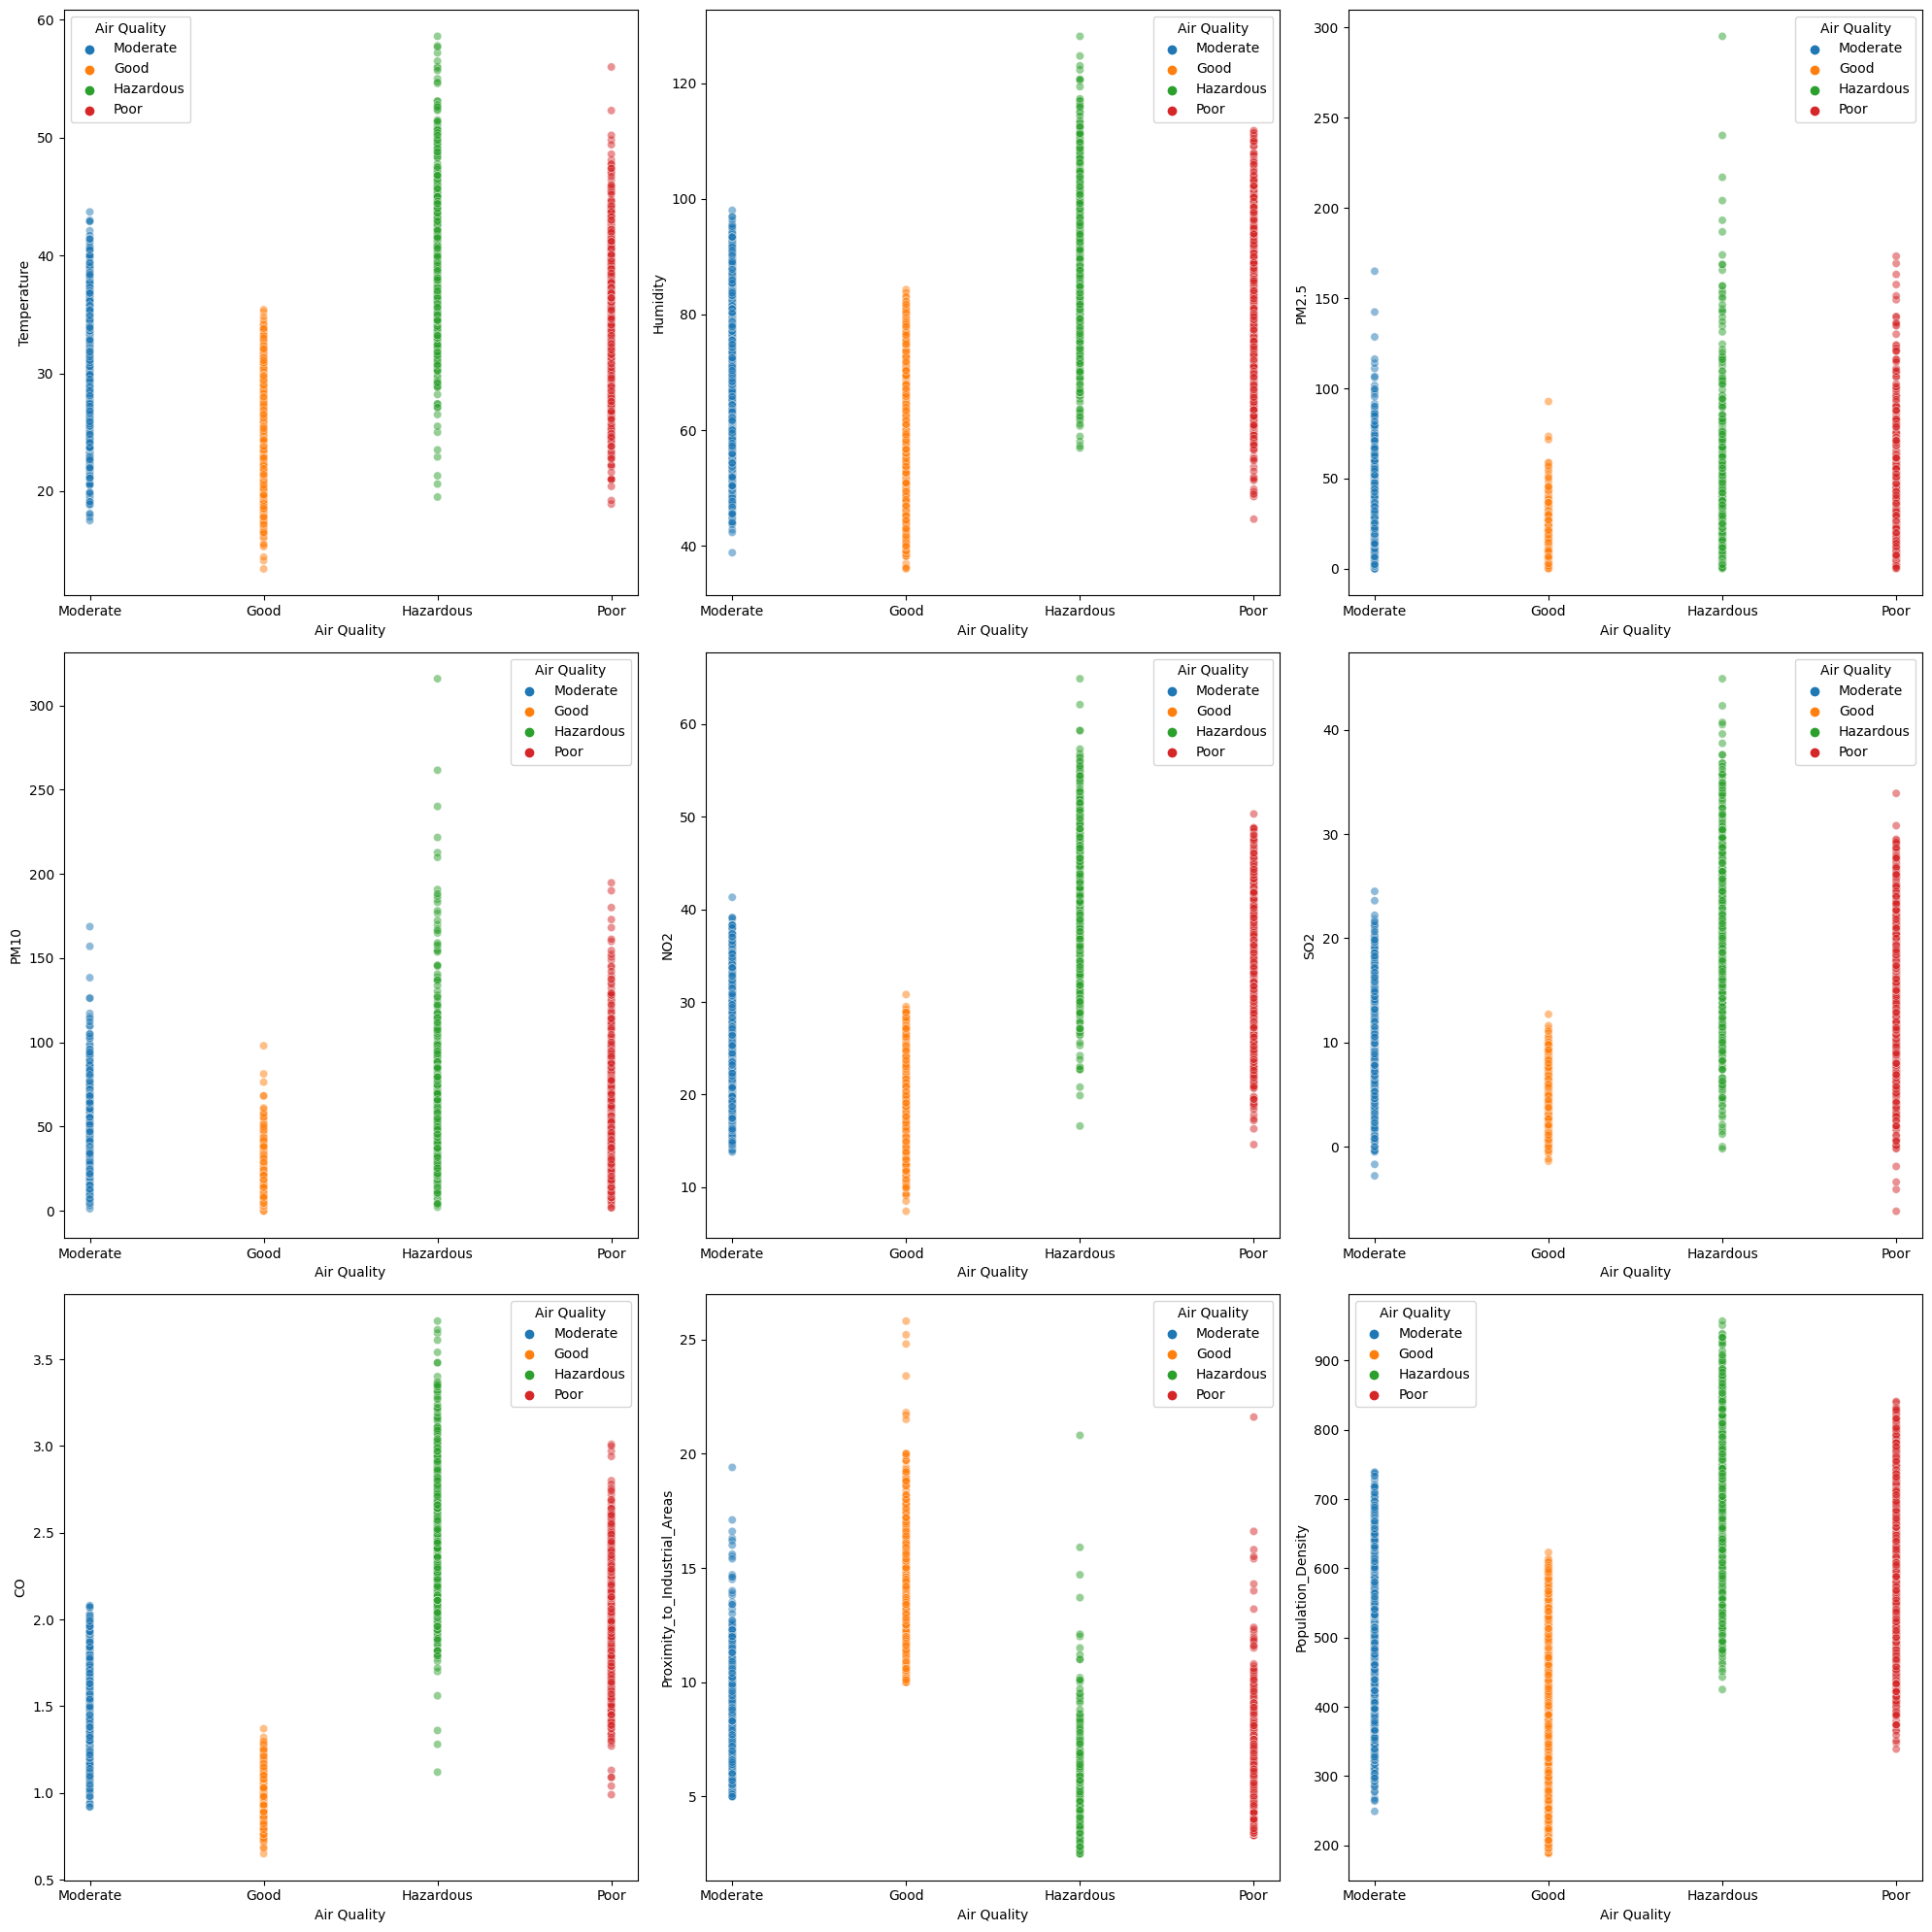

In [9]:
# Let us confirm if our conclusions are close by plotting scatter plots for the same
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()
i = 0
cols=df.drop(columns='Air Quality')
for col in cols:
    sns.scatterplot(data=df, x='Air Quality', y=col, ax=ax[i],hue='Air Quality',alpha=0.5)
    i += 1
plt.tight_layout()
plt.show()

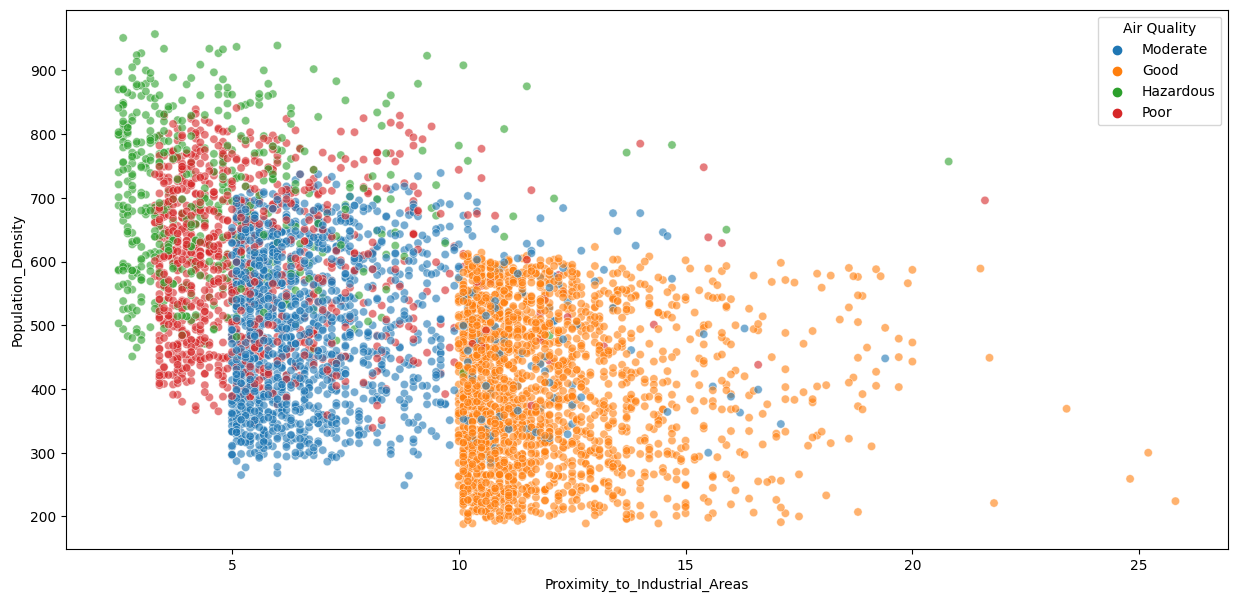

In [10]:
# Now let us look at how many people live close by to industrial areas
# In other words we plot a scatter plot between Proximity to industrial areas and Population Density

plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='Proximity_to_Industrial_Areas',y='Population_Density',hue='Air Quality',alpha=0.6)
plt.show()

**The above Scatter Plot provides us with clear Explanations:**

1. People living closer to Industrial Areas get decreasing quality of Air Quality
2. In other words Industrial Areas Proximity is Inversely Proportional to Air Quality

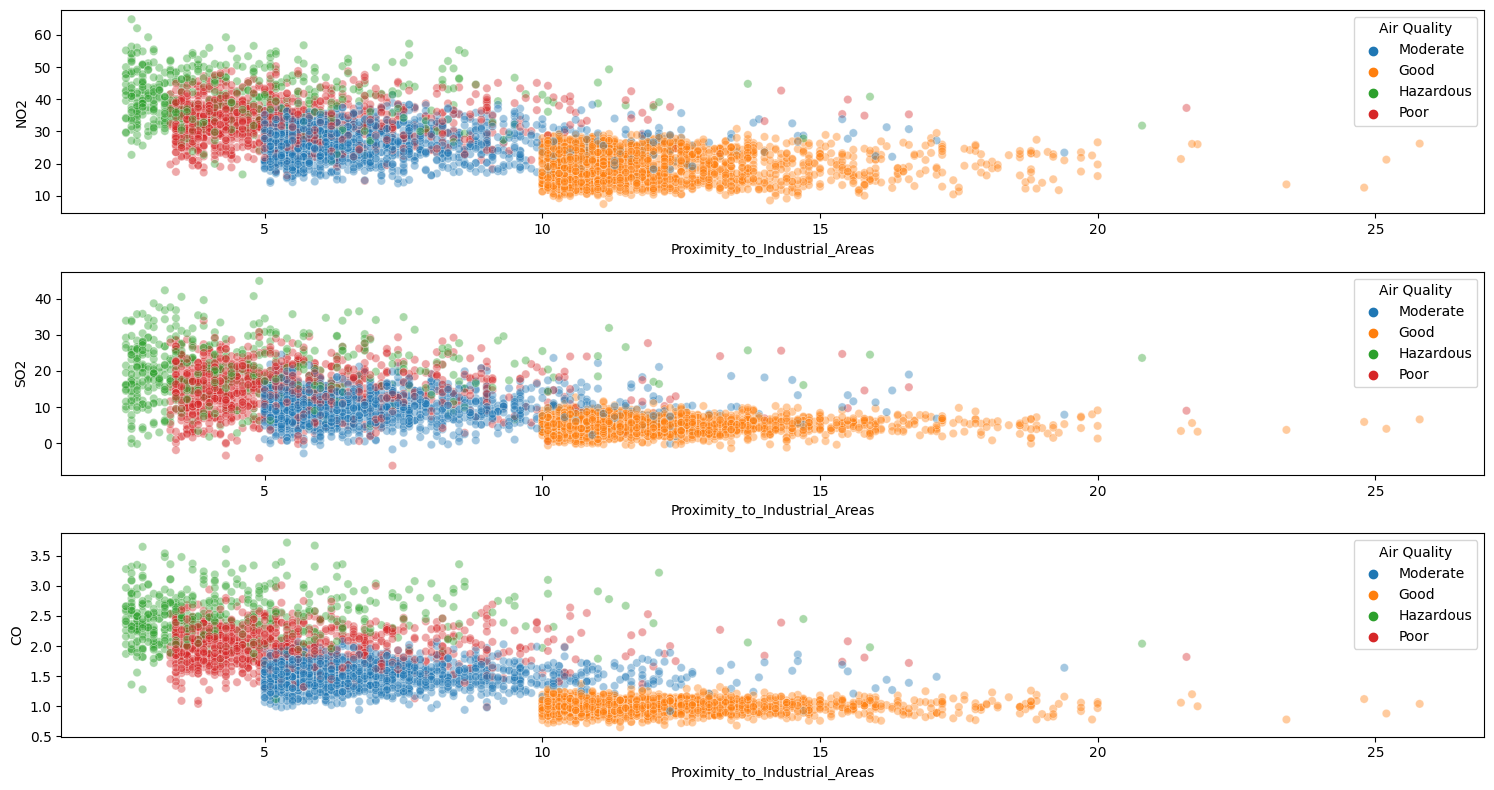

In [11]:
# Now let us look at how NO2,SO2 and CO change based on the location of Industrial Areas

fig,ax=plt.subplots(3,1,figsize=(15,8))
sns.scatterplot(data=df,y='NO2',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[0],hue='Air Quality')
sns.scatterplot(data=df,y='SO2',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[1],hue='Air Quality')
sns.scatterplot(data=df,y='CO',x='Proximity_to_Industrial_Areas',alpha=0.4,ax=ax[2],hue='Air Quality')
plt.tight_layout()
plt.show()

**Impact of Proximity to Industrial Areas:**


* As the proximity to industrial areas increases, there is a noticeable decrease in concentrations of NO₂, SO₂, and CO.
* This suggests that industrial activities significantly influence air pollution levels in nearby areas.

**Air Quality Categories:**


* Poor and Hazardous air quality is predominantly observed at lower proximity values (closer to industrial areas), indicating higher pollution levels.
* As the distance from industrial areas increases, air quality improves, transitioning from hazardous/poor to moderate/good categories.


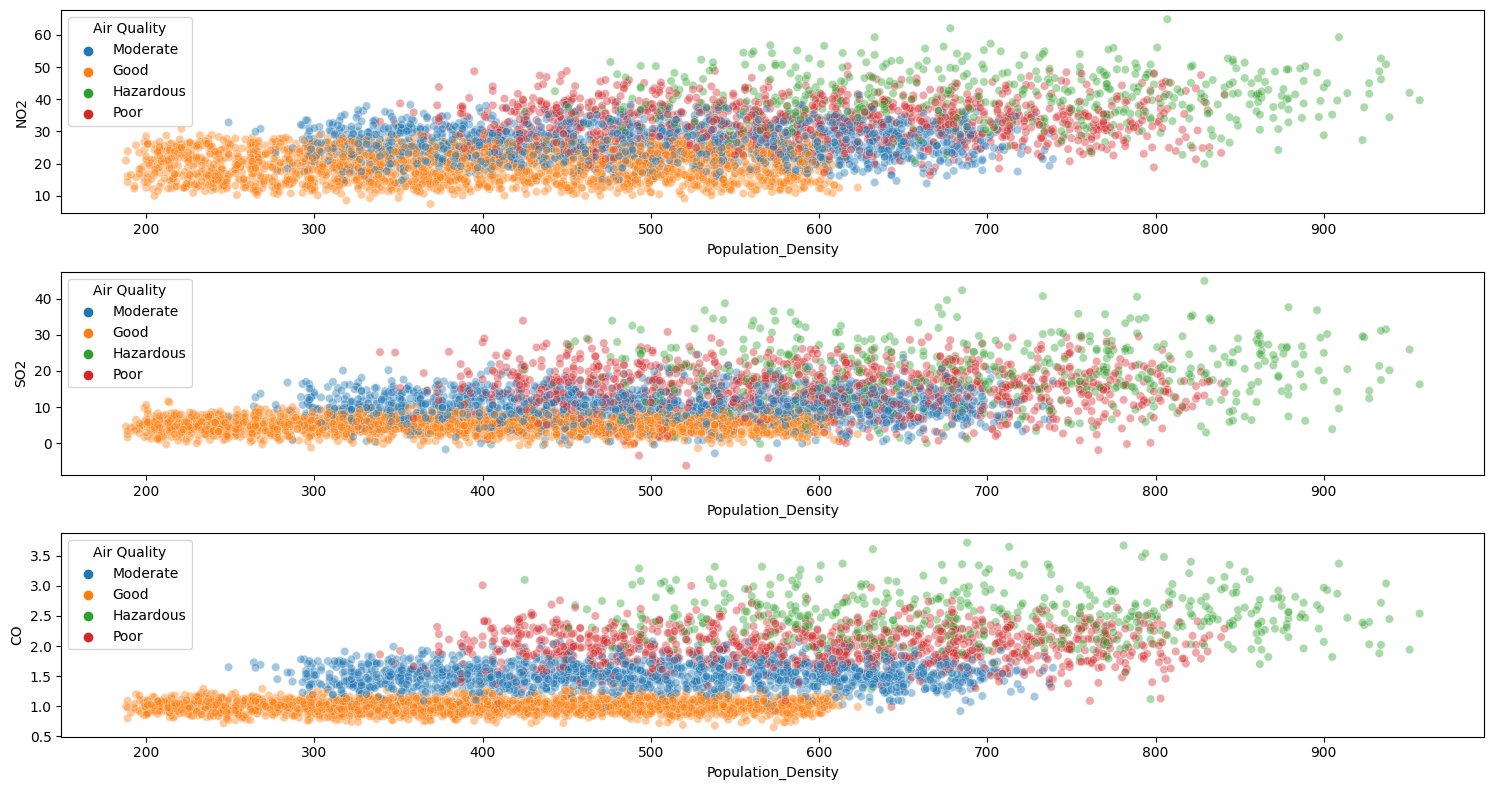

In [12]:
# Let us look at how our gases vary based on Population and How that affects ourr Air Quality
fig,ax=plt.subplots(3,1,figsize=(15,8))
sns.scatterplot(data=df,y='NO2',x='Population_Density',alpha=0.4,ax=ax[0],hue='Air Quality')
sns.scatterplot(data=df,y='SO2',x='Population_Density',alpha=0.4,ax=ax[1],hue='Air Quality')
sns.scatterplot(data=df,y='CO',x='Population_Density',alpha=0.4,ax=ax[2],hue='Air Quality')
plt.tight_layout()
plt.show()

**Influence of Population Density:**


* As population density increases, there is a gradual rise in the concentration of pollutants (NO₂, SO₂, and CO).
* Higher population density is associated with increased industrial, vehicular, and domestic emissions, leading to worsening air quality.

**Air Quality Patterns:**


* Poor and hazardous air quality is more prevalent at moderate-to-high population densities, indicating the cumulative impact of human activity on pollution levels.
* Areas with low population density exhibit relatively better air quality (good and moderate), suggesting fewer pollution sources.

**Pollutant Behavior:**


* NO₂ Levels: Show a steady increase with population density, likely due to vehicular and industrial emissions in densely populated areas.
* SO₂ Levels: Display a similar pattern to NO₂, reflecting increased combustion activities in high-density regions.
* CO Levels: Although CO levels are generally lower, they follow the same upward trend with population density.



**There are more visualizations that can be done with the given data, the above are just some examples to understand the data better**

****
# Data Preprocessing and Feature Selection #
****
**No Feature will be created here only the Correlation and Mutual Information are calculated and Visualized**

In [13]:
# importing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

In [14]:
# Let us look at our data first
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [15]:
# Let us drop all the duplicate values
df.drop_duplicates(keep='first',inplace=True)

In [16]:
# Let us check if we have any null values
df.isnull().any()

Temperature                      False
Humidity                         False
PM2.5                            False
PM10                             False
NO2                              False
SO2                              False
CO                               False
Proximity_to_Industrial_Areas    False
Population_Density               False
Air Quality                      False
dtype: bool

In [17]:
# No null values and no duplicates
# YAAAY!!
# Now let us encode our target variable so that it can pass though the model
# We will be using a tree structure therefore let us Label Encode it

le=LabelEncoder()
df['Air Quality']=le.fit_transform(df['Air Quality'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 390.8 KB


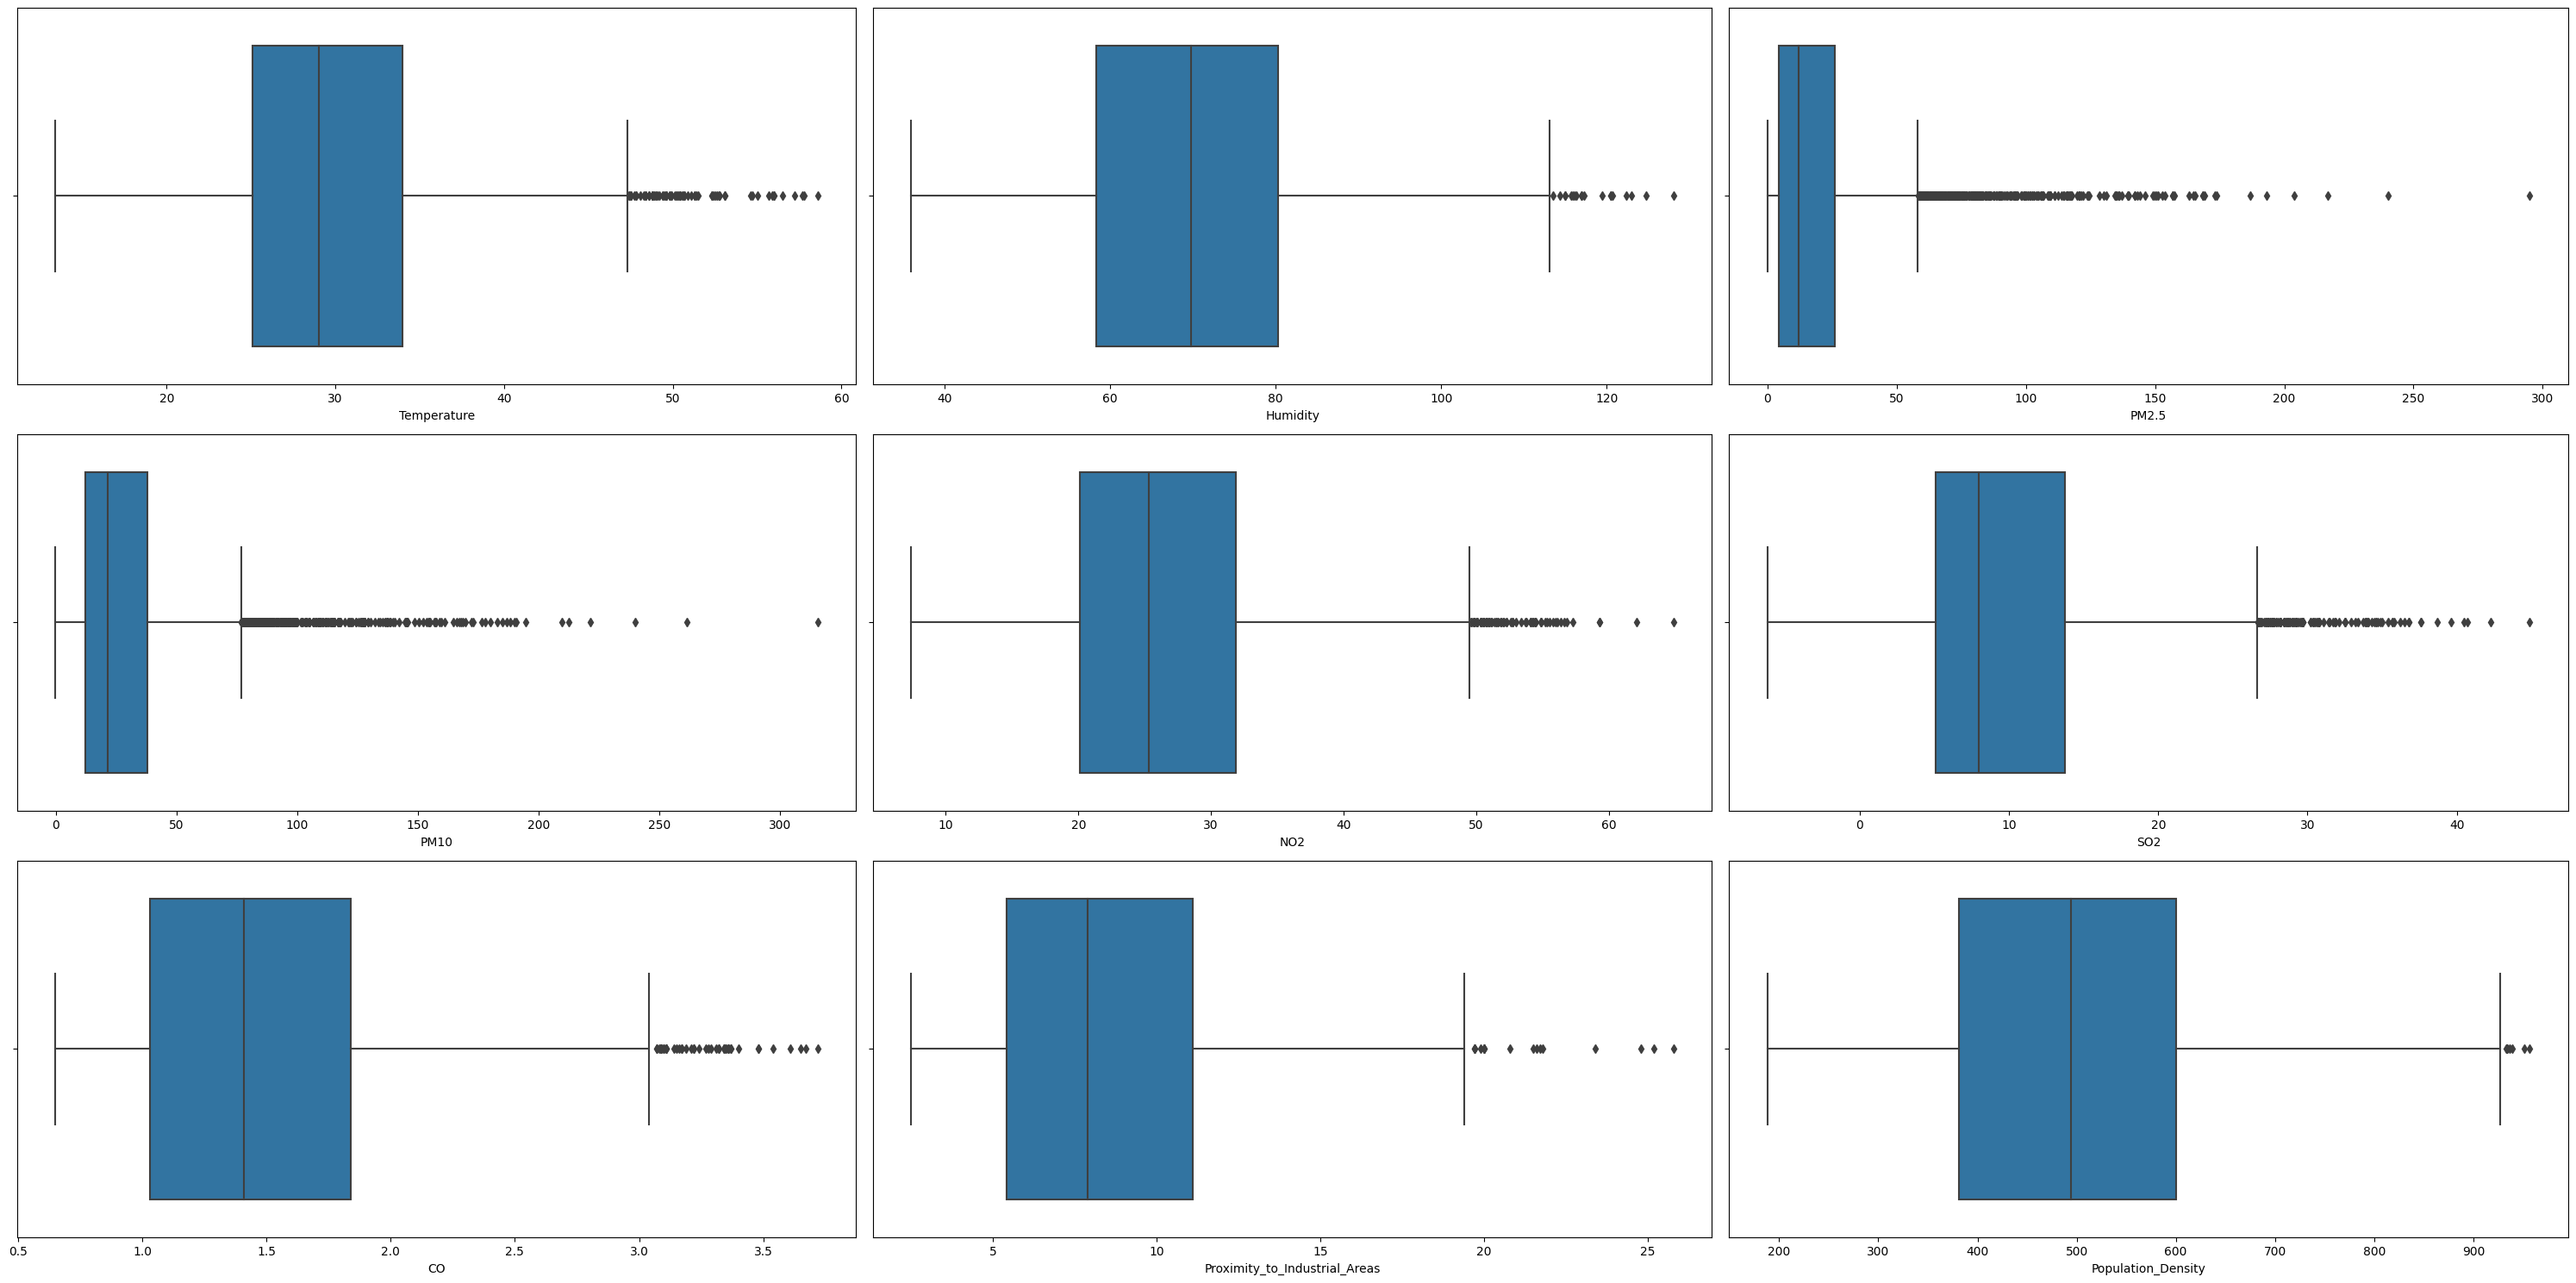

In [19]:
# Let us look at the outliers our features hold and try to remove them
# To visualize the outliers let us use boxplots

fig,ax=plt.subplots(3,3,figsize=(30,15))
ax=ax.flatten()
i=0

for col in df.columns:
    if col!='Air Quality' and i<9:
        sns.boxplot(data=df,x=col,ax=ax[i])
        i+=1

plt.tight_layout()
plt.show()

In [20]:
# We have Outliers in almost all our Features
# Let us remove it using Inter Quartile Range

for col in df.drop(columns='Air Quality').columns:
    q1=np.quantile(df[col],0.25)
    q3=np.quantile(df[col],0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+iqr*1.5
    df=df[(df[col]>=lb)&(df[col]<=ub)]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   int64  
dtypes: float64(8), int64(2)
memory usage: 357.3 KB


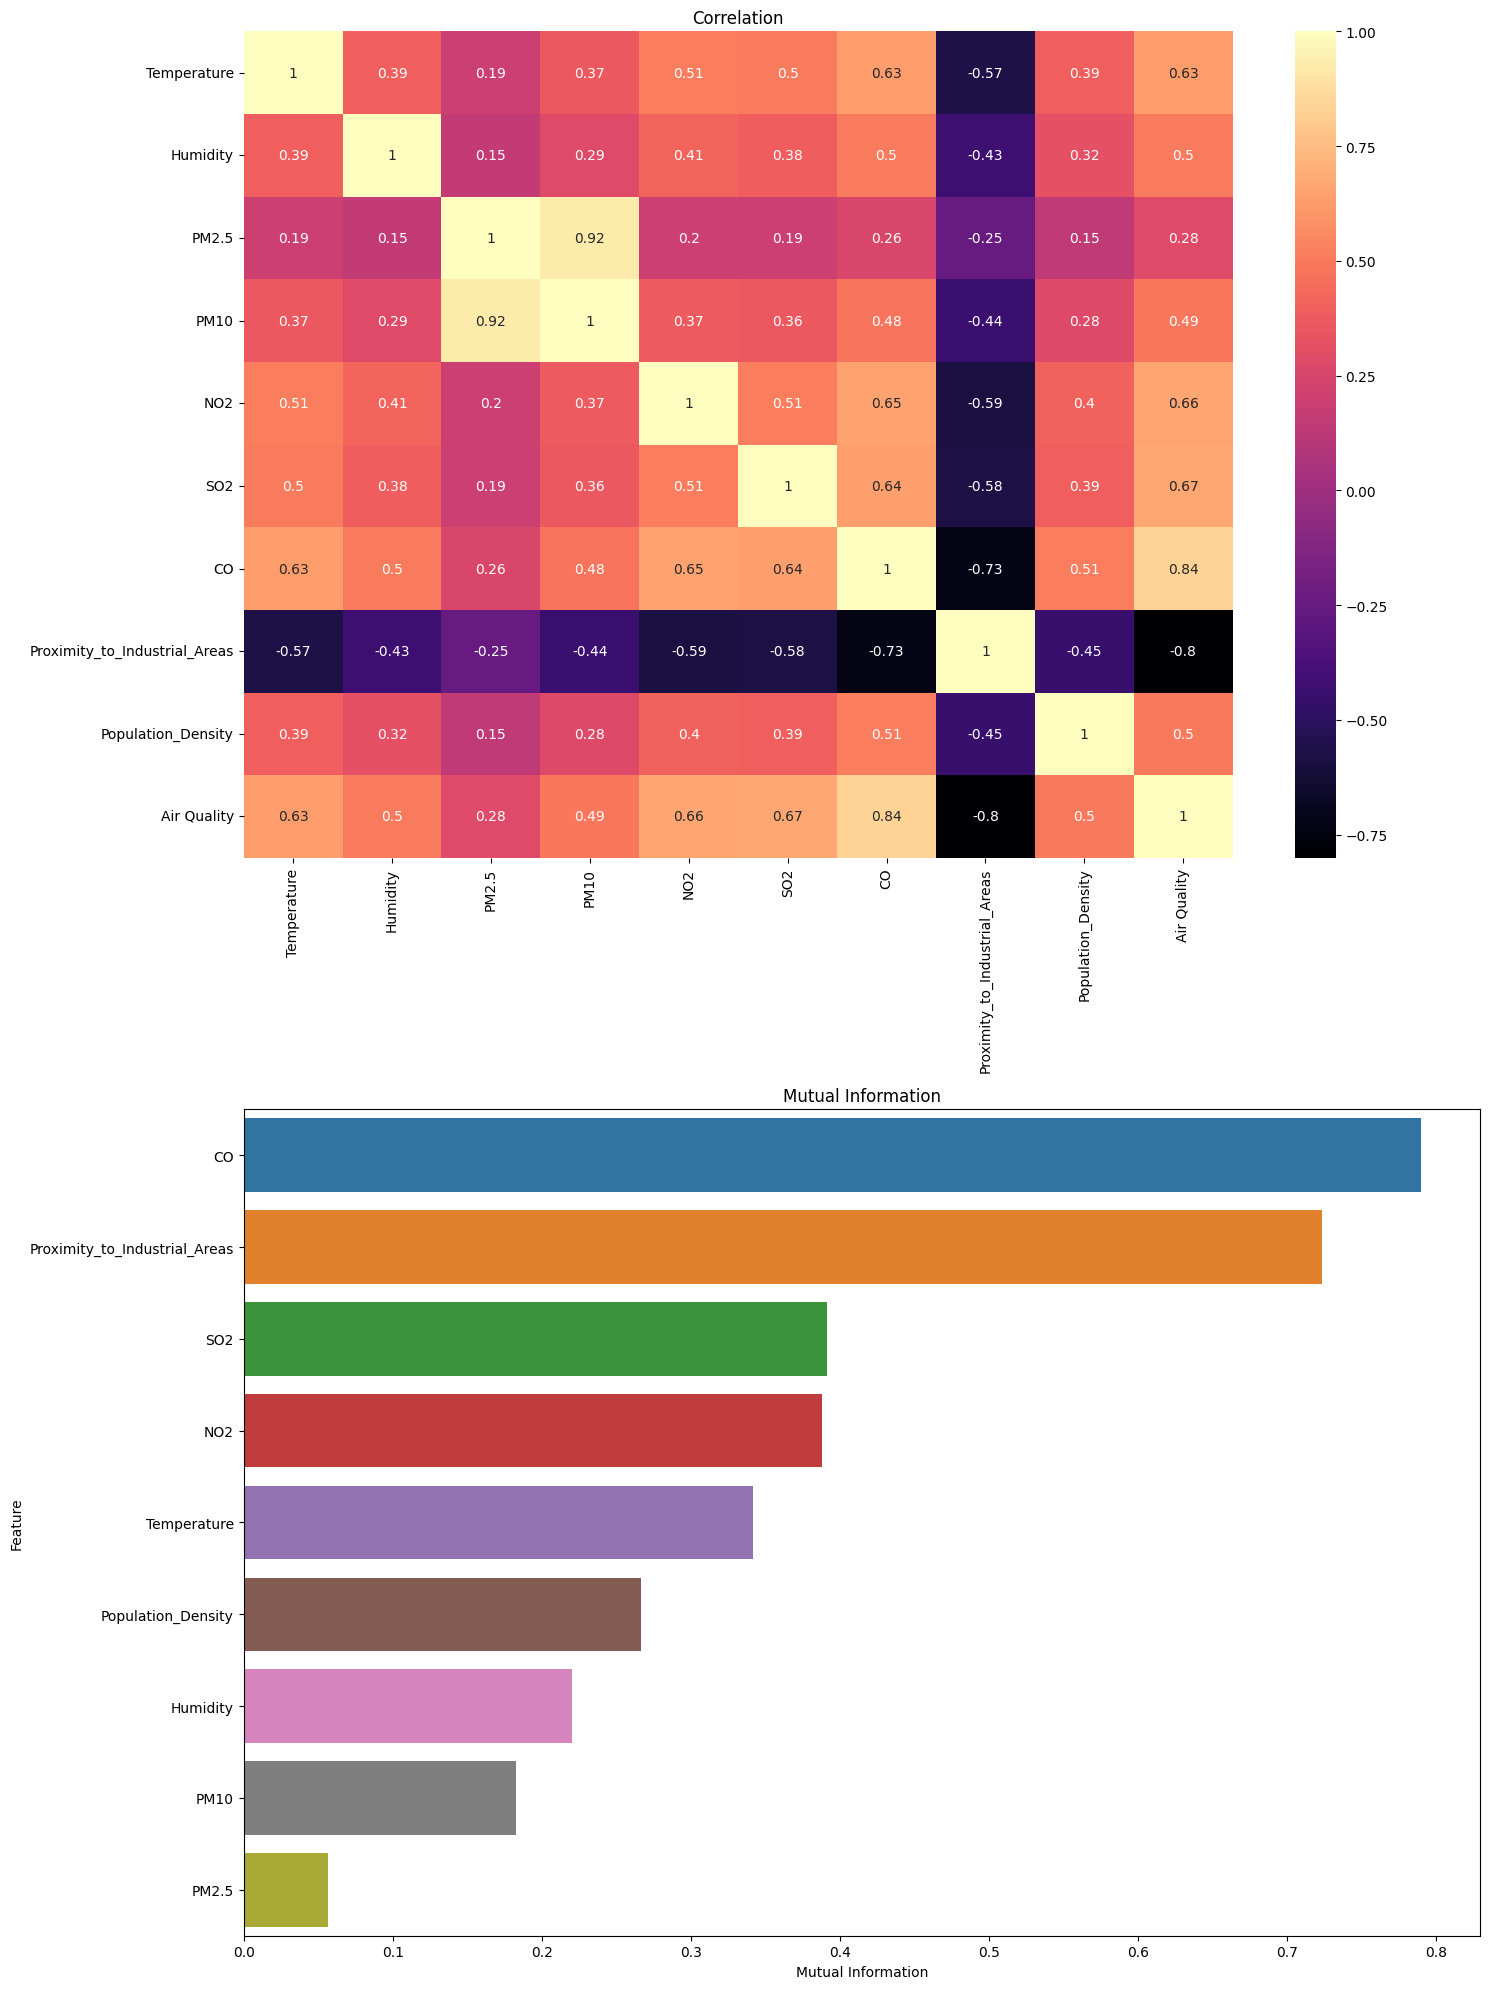

In [22]:
# We have Removed all the Outliers :)


# Now Let us calculate Mutual information and then proceed to visualize correlation along with mutual information
# Calculating Mutual Information
tdf=df.copy()  
x=tdf.drop(columns='Air Quality')
y=tdf['Air Quality']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

# Visualizing Mutual Information and correlation 
fig,ax=plt.subplots(2,1,figsize=(15,20))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.tight_layout()
plt.show()

****
# Data Preparation #
****

In [23]:
#importing
from sklearn.model_selection import train_test_split

In [24]:
# Splitting the dataset into features and target variables
# Splitting the features and target variables into training(75%) and testing set(25%)

x=df.drop(columns='Air Quality')
y=df['Air Quality']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)
print(x_t.shape,y_t.shape,x_te.shape,y_te.shape)

(3118, 9) (3118,) (1040, 9) (1040,)


****
# Model - Random Forest #
****

In [25]:
# importing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [26]:
rf=RandomForestClassifier()
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,41)),
        'min_samples_leaf':list(np.arange(2,41)),'max_features':['sqrt','log2',None],'n_estimators':[400]}

nrf=RandomizedSearchCV(rf,param_distributions=params,random_state=20,cv=10,scoring='accuracy',n_jobs=-1)
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)

nrf=nrf.best_estimator_

{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'criterion': 'gini'}
0.9653619424519746


In [27]:
predt=nrf.predict(x_t)
pred=nrf.predict(x_te)

****
# Evalaution Metrics #
****

In [28]:
# importing
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

Training Evalaution Metrics:
Accuracy:  0.9833226427196922
Precision:  0.9833226427196922
Recall:  0.9833226427196922
F1 Score:  0.9833226427196922

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1497
           1       1.00      0.72      0.84        76
           2       0.98      0.99      0.98      1023
           3       0.95      0.96      0.96       522

    accuracy                           0.98      3118
   macro avg       0.98      0.92      0.94      3118
weighted avg       0.98      0.98      0.98      3118


Confusion Matrix: 



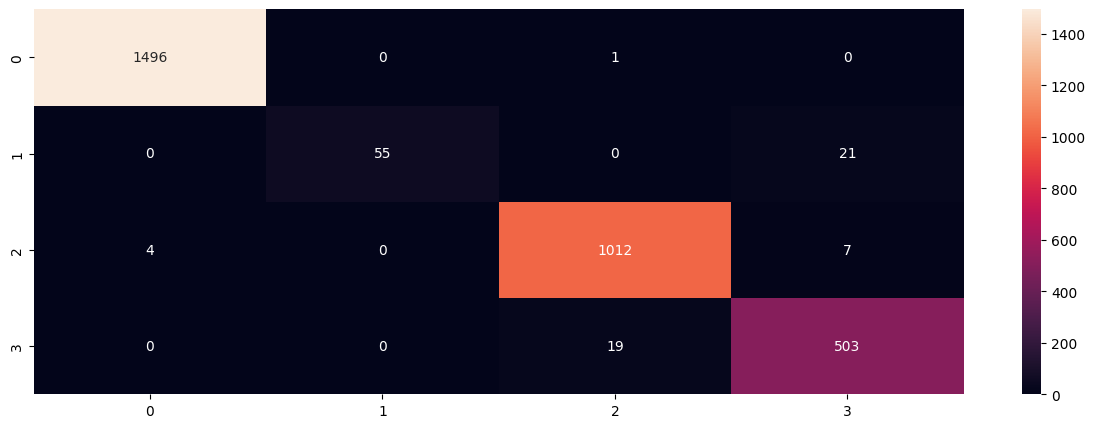

In [29]:
print("Training Evalaution Metrics:")
print("Accuracy: ",accuracy_score(y_t,predt))
print("Precision: ",precision_score(y_t,predt,average='micro'))
print("Recall: ",recall_score(y_t,predt,average='micro'))
print("F1 Score: ",f1_score(y_t,predt,average='micro'))
print("\nClassification Report: \n",classification_report(y_t,predt))
print("\nConfusion Matrix: \n")
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_t,predt),annot=True,fmt='d')
plt.show()

Testing Evalaution Metrics:
Accuracy:  0.9644230769230769
Precision:  0.9644230769230769
Recall:  0.9644230769230769
F1 Score:  0.9644230769230769

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       483
           1       0.80      0.31      0.44        13
           2       0.95      0.98      0.96       366
           3       0.91      0.90      0.90       178

    accuracy                           0.96      1040
   macro avg       0.91      0.80      0.83      1040
weighted avg       0.96      0.96      0.96      1040


Confusion Matrix: 



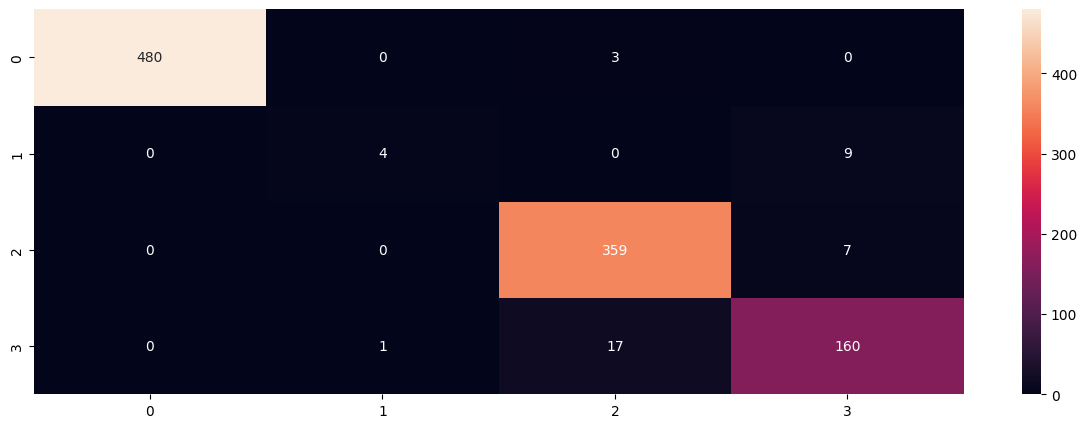

In [30]:
print("Testing Evalaution Metrics:")
print("Accuracy: ",accuracy_score(y_te,pred))
print("Precision: ",precision_score(y_te,pred,average='micro'))
print("Recall: ",recall_score(y_te,pred,average='micro'))
print("F1 Score: ",f1_score(y_te,pred,average='micro'))
print("\nClassification Report: \n",classification_report(y_te,pred))
print("\nConfusion Matrix: \n")
plt.figure(figsize=(15,5))
sns.heatmap(confusion_matrix(y_te,pred),annot=True,fmt='d')
plt.show()

****
# Conclusion, Feedback and Suggestions #
****

**We have arrived at an accuracy of about 96%, the accuracy is varying due to the imbalanced Class distribution**

**If you liked this notebook or if this notebook has helped you in any way kindly Upvote :)**

**Please provide feedback and suggestions to improve this notebook**